In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 68.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
data_path = "/kaggle/input/apr-final-dataset/dataset"

print("Train images:", data_path + "/train/images")
print("Val images:", data_path + "/val/images")
print("Test images:", data_path + "/test/images")

Train images: /kaggle/input/apr-final-dataset/dataset/train/images
Val images: /kaggle/input/apr-final-dataset/dataset/val/images
Test images: /kaggle/input/apr-final-dataset/dataset/test/images


In [7]:
yaml_content = f"""
train: {data_path}/train/images
val: {data_path}/val/images
test: {data_path}/test/images

nc: 2
names: ['fake','real']
"""
with open("data.yaml", "w") as f:
    f.write(yaml_content)

In [5]:
pip install "numpy<2" --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32

In [15]:
!yolo task=detect mode=train model=yolo11m.pt data=data.yaml epochs=100 imgsz=640 patience=25

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, li

In [8]:
!yolo detect val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/data.yaml split=test

Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.6±5.2 MB/s, size: 79.3 KB)
val: Scanning /kaggle/input/apr-final-dataset/dataset/test/labels... 854 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 854/854 176.3it/s 4.8s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/apr-final-dataset/dataset/test is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 54/54 2.9it/s 18.8s0.3s
                   all        854        854      0.972      0.986      0.994      0.964
                  fake        412        412          1      0.986      0.995       0.98
                  real        442        442      0.945      0.986      0.993      0.949
Speed: 0.9ms preprocess, 17.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results

## Checking for Threshold

In [9]:
!yolo detect val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/data.yaml split=test conf=0.15

Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 146.9±18.3 MB/s, size: 78.8 KB)
val: Scanning /kaggle/input/apr-final-dataset/dataset/test/labels... 854 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 854/854 945.6it/s 0.9s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/apr-final-dataset/dataset/test is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 54/54 2.9it/s 18.6s0.3s
                   all        854        854      0.972      0.986      0.994      0.969
                  fake        412        412          1      0.986      0.995      0.984
                  real        442        442      0.945      0.986      0.993      0.955
Speed: 1.0ms preprocess, 17.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Resul

In [10]:
!yolo detect val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/data.yaml split=test conf=0.05

Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 93.4±52.2 MB/s, size: 77.9 KB)
val: Scanning /kaggle/input/apr-final-dataset/dataset/test/labels... 854 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 854/854 904.0it/s 0.9s0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/apr-final-dataset/dataset/test is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 54/54 2.8it/s 19.2s0.4s
                   all        854        854      0.972      0.986      0.994      0.969
                  fake        412        412          1      0.986      0.995      0.984
                  real        442        442      0.945      0.986      0.993      0.954
Speed: 1.0ms preprocess, 18.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Result

In [11]:
!ls runs/detect/train

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


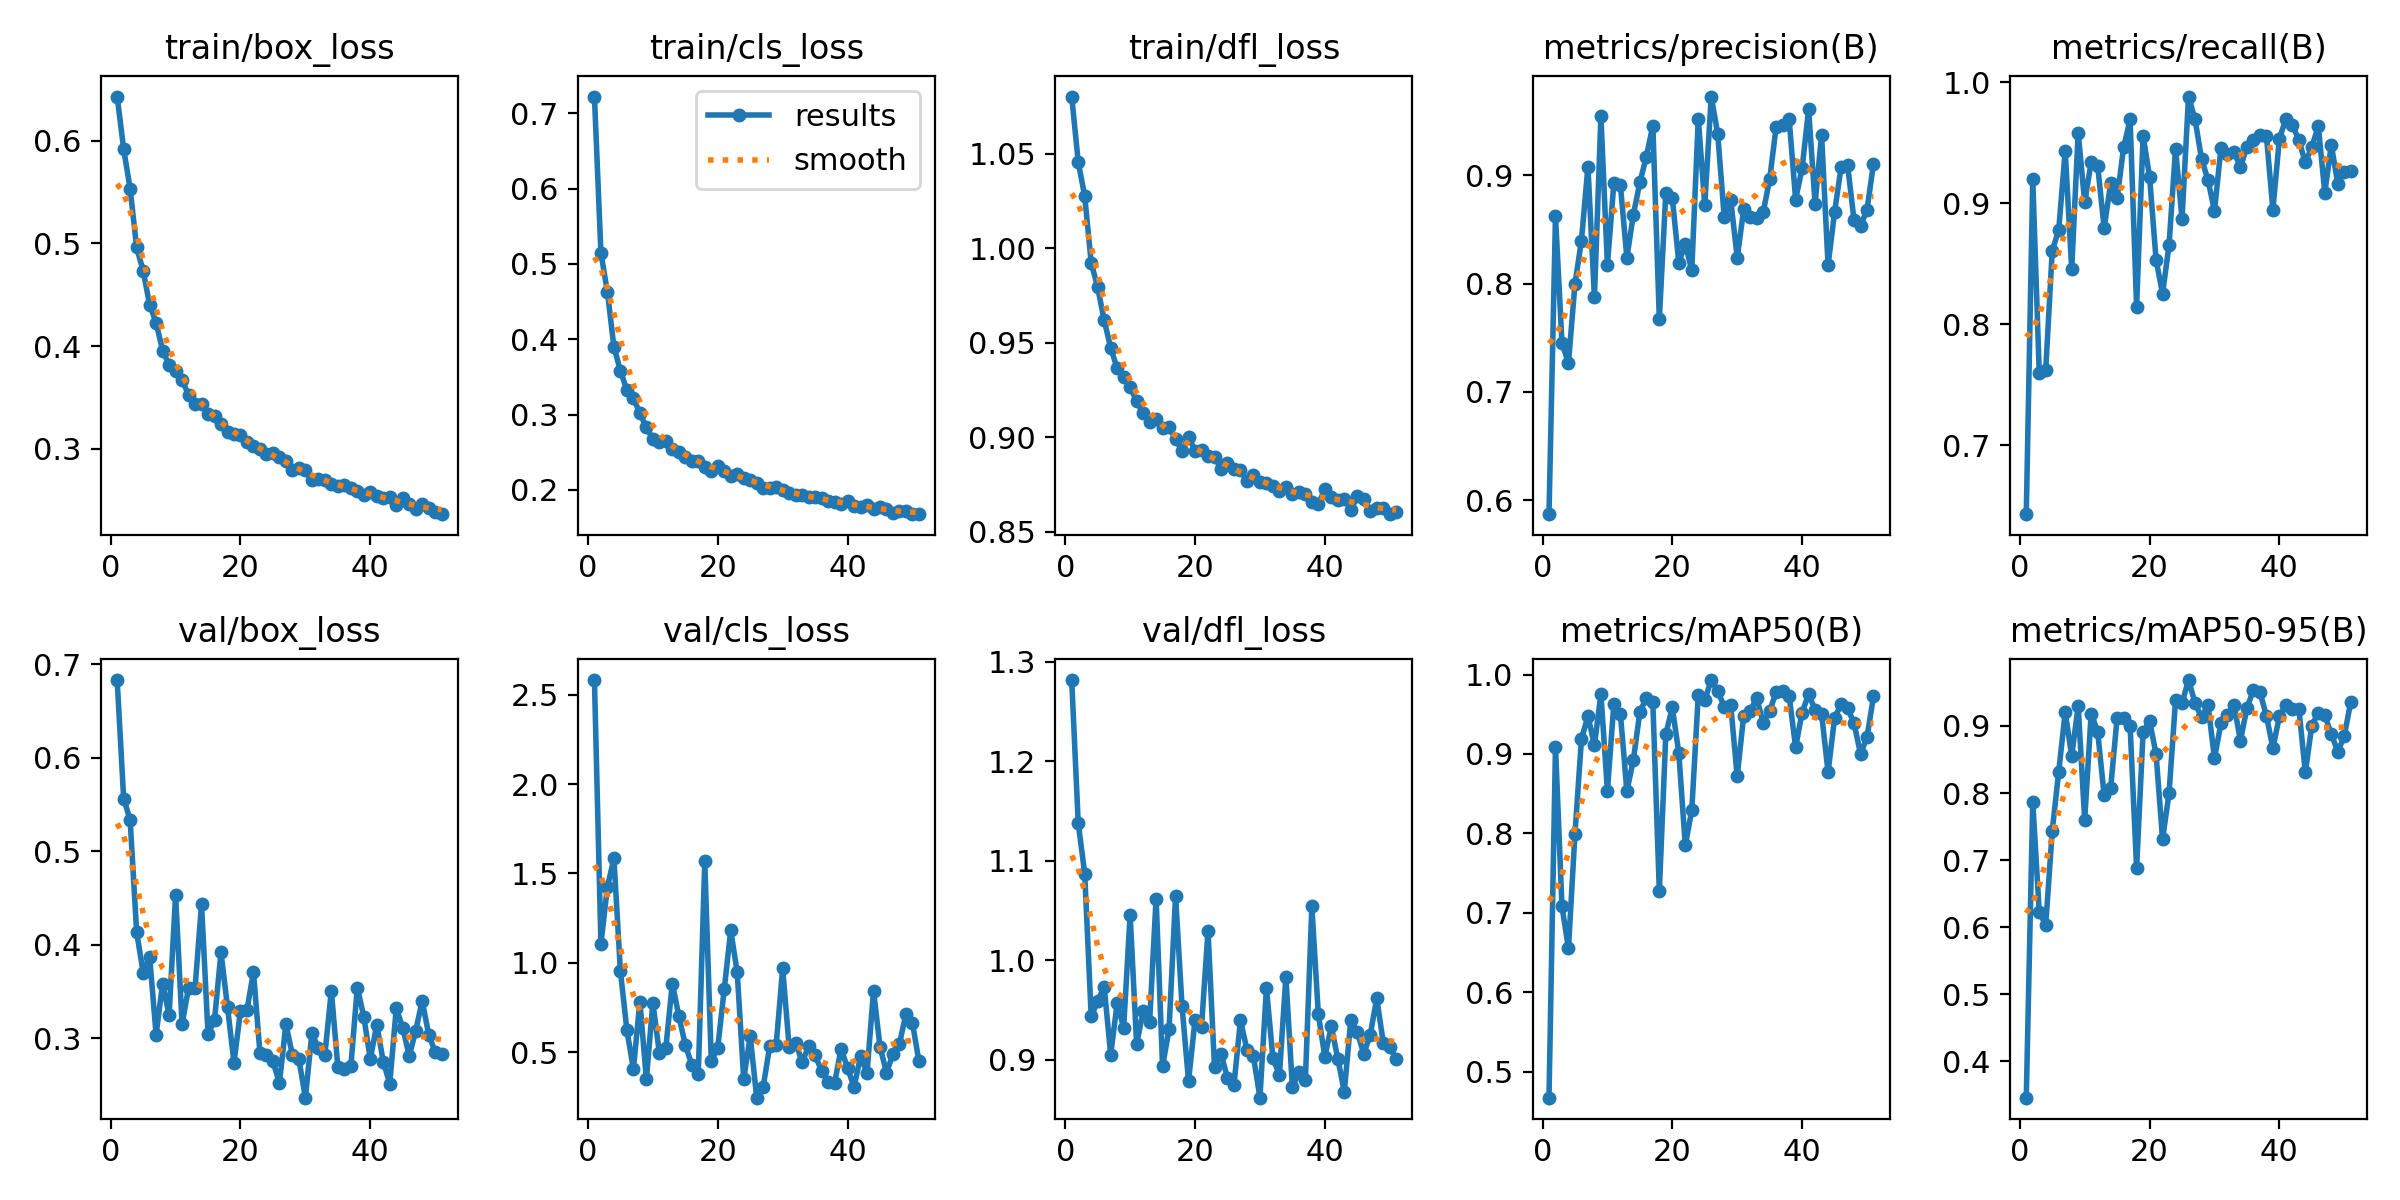

In [12]:
from IPython.display import Image

Image(filename='runs/detect/train/results.png')

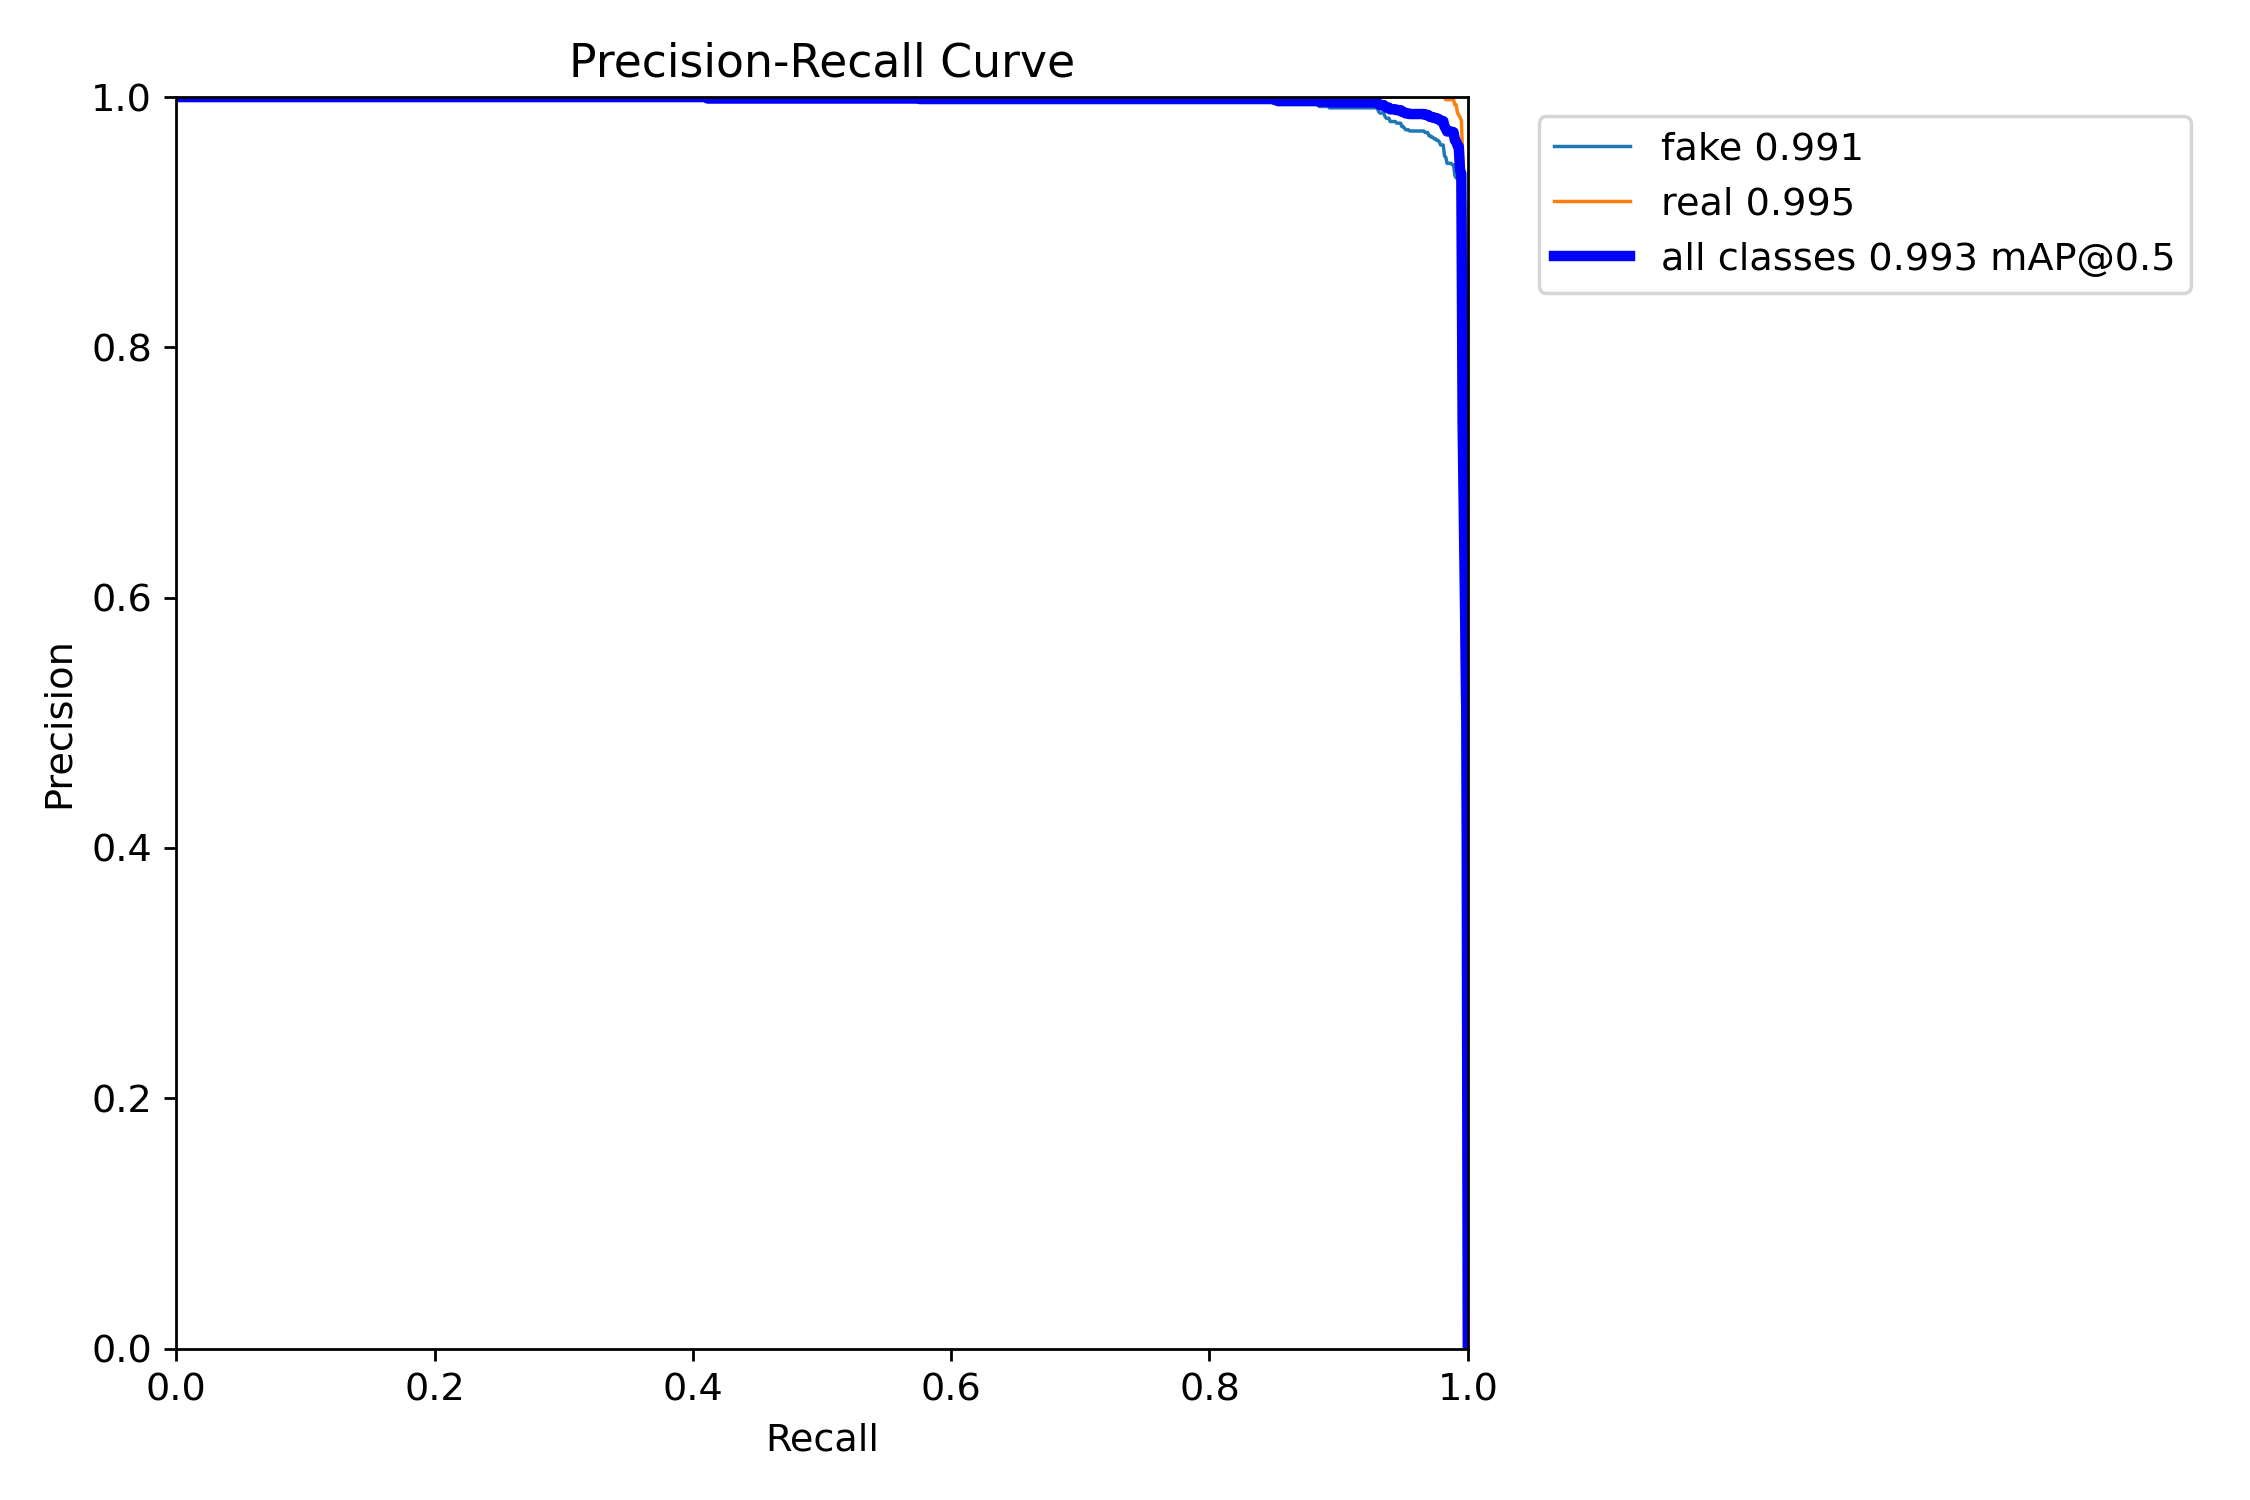

In [13]:
Image(filename='runs/detect/train/BoxPR_curve.png')

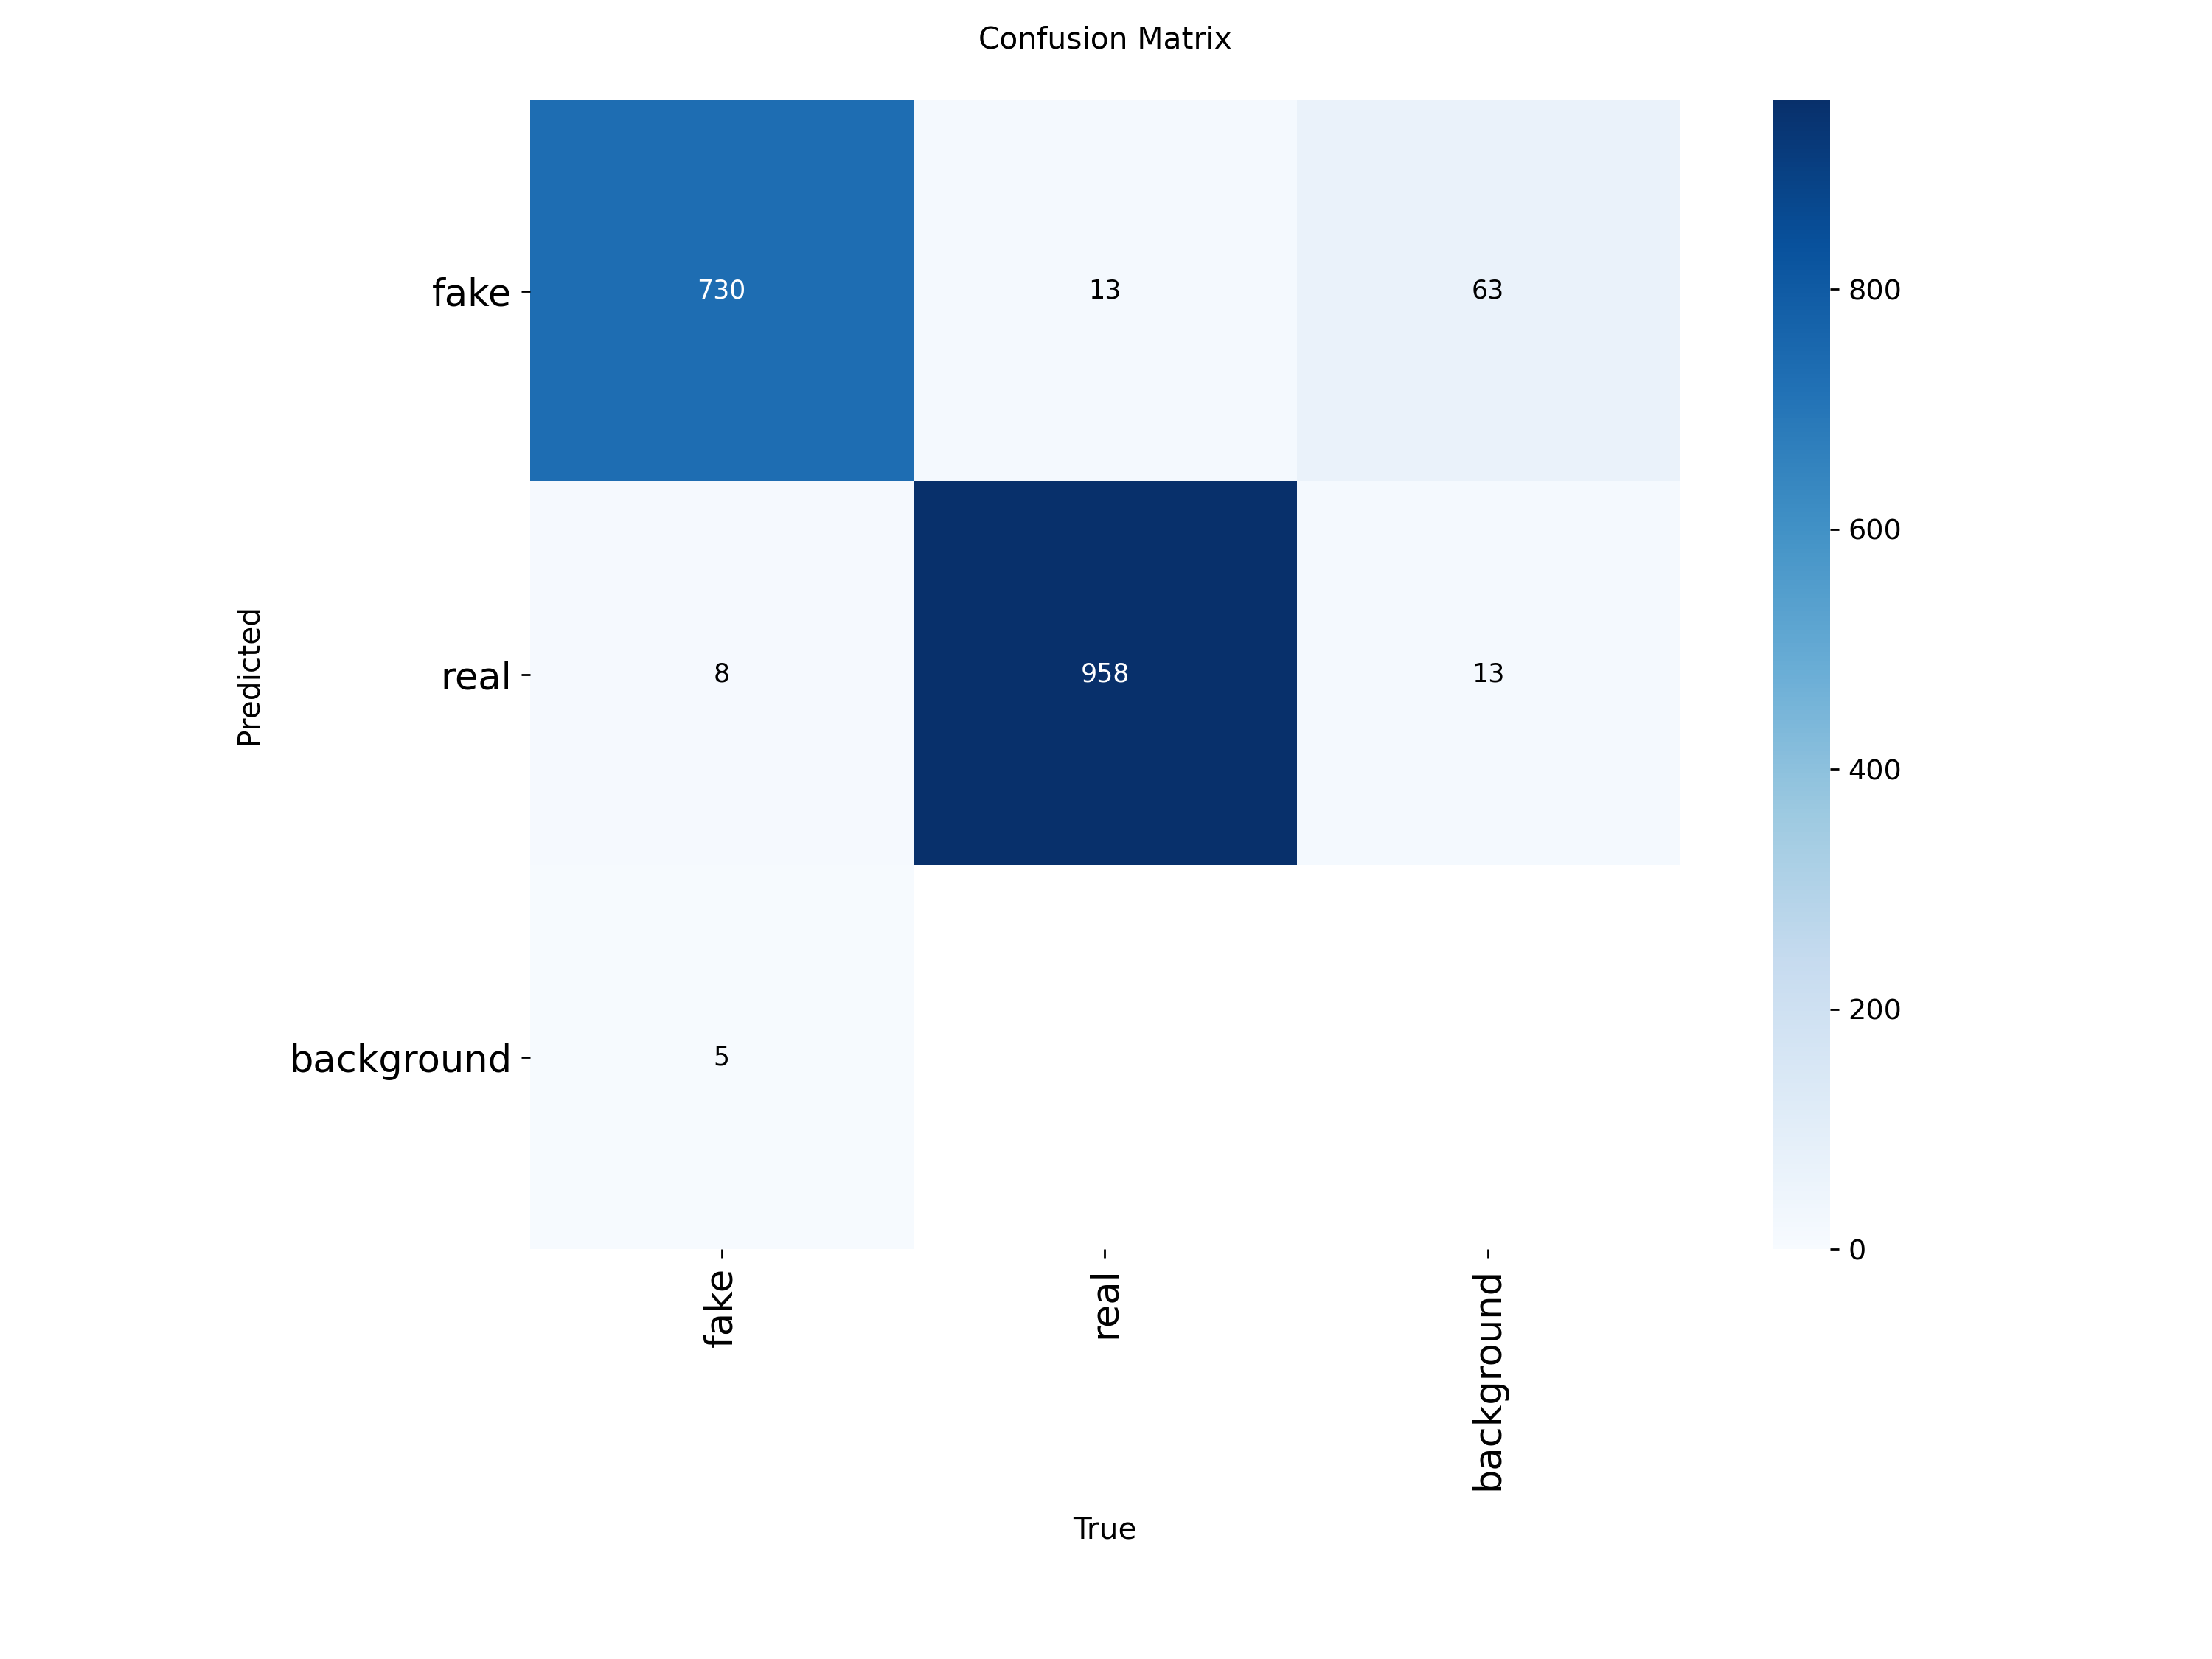

In [14]:
Image(filename='runs/detect/train/confusion_matrix.png')